# PART 1 : Exploratory Data Analysis for a retails recommendation system

# Let's start our notebook by writting down the summary

I. Import useful library and python file containing our functions  

II. Focus on products  

III. Focus on customer information  
* A. City_code
* B. Gender
* C. Age

IV. Focus on Transaction  
* A. Store_type
* B. Items repartition
* C. Mean Rank
* D. Number of transactions  

V. Creation of the item-user matrix
* A. Setting treshold (to 3)
* B. Create the matrix
* C. Information about the matrix

# I. Import useful library and python file containing our functions

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import Function_01 as f1

# set the graphs to show in the jupyter notebook
%matplotlib inline

# II. Focus on products

In [28]:
Product_info = pd.read_csv("prod_cat_info.csv")
Product_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [29]:
print(f'There is {len(Product_info)} unique products')

There is 23 unique products


We have 23 different products for our study

Here, we match product category code and product subcategory code with the full name and an object id to separate them easily

In [30]:
Product_info = f1.enhance_product_df(Product_info)
Product_info.to_csv('product_info_mapped.csv')
Product_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,object_id,object_name
0,1,Clothing,4,Mens,1_4,Clothing_Mens
1,1,Clothing,1,Women,1_1,Clothing_Women
2,1,Clothing,3,Kids,1_3,Clothing_Kids
3,2,Footwear,1,Mens,2_1,Footwear_Mens
4,2,Footwear,3,Women,2_3,Footwear_Women


We also create a dictionnary in case we need to map object_id and object_name

In [31]:
dict_object = f1.create_dict_object(Product_info, 'object_id', 'object_name')
dict_object

{'1_4': 'Clothing_Mens',
 '1_1': 'Clothing_Women',
 '1_3': 'Clothing_Kids',
 '2_1': 'Footwear_Mens',
 '2_3': 'Footwear_Women',
 '2_4': 'Footwear_Kids',
 '3_4': 'Electronics_Mobiles',
 '3_5': 'Electronics_Computers',
 '3_8': 'Electronics_Personal Appliances',
 '3_9': 'Electronics_Cameras',
 '3_10': 'Electronics_Audio and video',
 '4_1': 'Bags_Mens',
 '4_4': 'Bags_Women',
 '5_7': 'Books_Fiction',
 '5_12': 'Books_Academic',
 '5_10': 'Books_Non-Fiction',
 '5_11': 'Books_Children',
 '5_3': 'Books_Comics',
 '5_6': 'Books_DIY',
 '6_2': 'Home and kitchen_Furnishing',
 '6_10': 'Home and kitchen_Kitchen',
 '6_11': 'Home and kitchen_Bath',
 '6_12': 'Home and kitchen_Tools'}

# III. Focus on customer information

In [32]:
customers_info = pd.read_csv("Customer.csv")
customers_info.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [33]:
print(f'they are {len(customers_info)} uniques clients')

they are 5647 uniques clients


So, they are 5647 different customers

## A. City_code

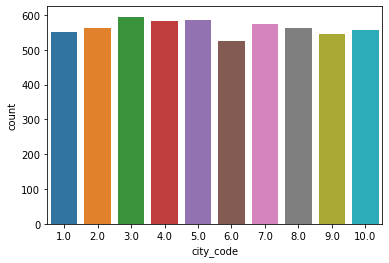

In [34]:
f1.hist(customers_info, 'city_code')

So, we can see that all city code are equally represented.  
In this study, we will consider that if two cities are close in number, they are near geographically speaking.

## B. Gender

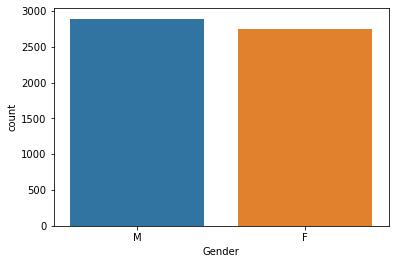

In [35]:
f1.hist(customers_info, 'Gender')

We can see that both gender are equally distributed

## C. Age

Let's calculte the date from the date of birth to the date of transaction to see age distribution when they buy theirs items

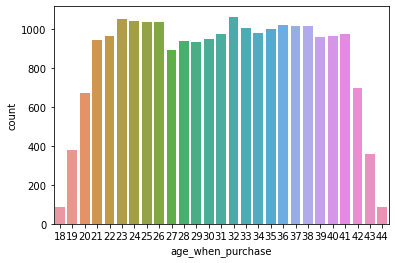

In [36]:
customers_info = f1.age_from_transaction(customers_info)
f1.hist(customers_info, 'age_when_purchase')

In [37]:
customers_info.head()

,customer_Id,Gender,DOB,age_when_purchase,city_code
0,270351,M,1981-09-26,32,5.0
1,270384,F,1973-05-11,41,8.0
2,273420,M,1992-07-27,21,8.0
3,271509,M,1981-06-08,33,3.0
4,273420,M,1992-07-27,21,8.0


# IV. Focus on Transaction

In [38]:
transaction = pd.read_csv("Transactions.csv")
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


We will drop informations that we don't need like : 
* transaction_id
* Rate
* Tax
* total_amt

We will add object_id and object_name

We will change the column name Qty by rank corresponding to how much the personne like this object

We remove all Qty or Rank bellow 0 which correspond to retrieve items

In [39]:
new_transaction = f1.modification_on_transcation(transaction, dict_object)
new_transaction.head()

,cust_id,tran_date,prod_subcat_code,prod_cat_code,rank,Store_type,object_id,object_name
0,270384,20-02-2014,5,3,5,e-Shop,3_5,Electronics_Computers
1,267750,20-02-2014,12,6,3,e-Shop,6_12,Home and kitchen_Tools
2,275023,20-02-2014,6,5,4,e-Shop,5_6,Books_DIY
3,269345,20-02-2014,3,5,3,e-Shop,5_3,Books_Comics
4,268799,20-02-2014,7,5,5,e-Shop,5_7,Books_Fiction


## A. Store_type

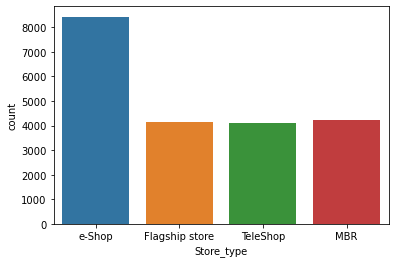

In [40]:
f1.hist(new_transaction, 'Store_type')

We can se that e-shop is more used than other type of store

## B. Items repartition

This is a dictionnay to map code with a name

In [41]:
print(dict_object)

{'1_4': 'Clothing_Mens', '1_1': 'Clothing_Women', '1_3': 'Clothing_Kids', '2_1': 'Footwear_Mens', '2_3': 'Footwear_Women', '2_4': 'Footwear_Kids', '3_4': 'Electronics_Mobiles', '3_5': 'Electronics_Computers', '3_8': 'Electronics_Personal Appliances', '3_9': 'Electronics_Cameras', '3_10': 'Electronics_Audio and video', '4_1': 'Bags_Mens', '4_4': 'Bags_Women', '5_7': 'Books_Fiction', '5_12': 'Books_Academic', '5_10': 'Books_Non-Fiction', '5_11': 'Books_Children', '5_3': 'Books_Comics', '5_6': 'Books_DIY', '6_2': 'Home and kitchen_Furnishing', '6_10': 'Home and kitchen_Kitchen', '6_11': 'Home and kitchen_Bath', '6_12': 'Home and kitchen_Tools'}


* Category Repartition

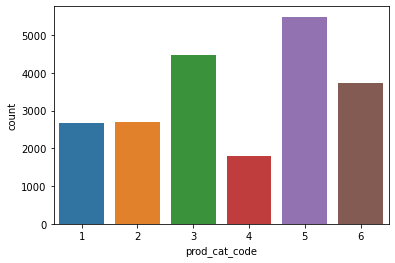

In [42]:
f1.hist(new_transaction, 'prod_cat_code')

* SubCategory Repartition

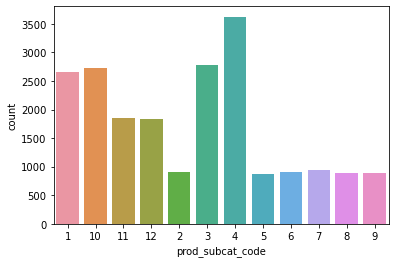

In [43]:
f1.hist(new_transaction, 'prod_subcat_code')

* Items Repartition

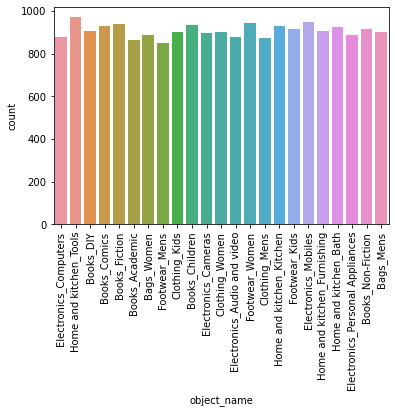

In [44]:
f1.hist(new_transaction, 'object_name', True)

So we can see that all item are equally reparted with a number of transaction equivalent to 850

## C. Mean Rank

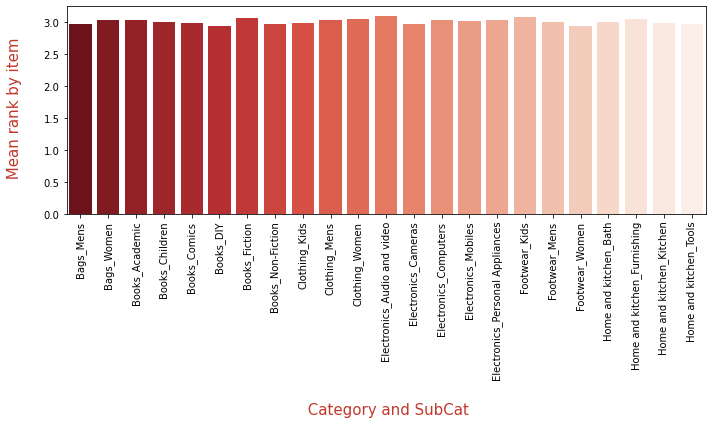

In [45]:
mean_rank = new_transaction.groupby('object_name').mean().reset_index()
f1.barplot_display_cat(mean_rank, 'object_name', 'rank')

So we can see that all object have the same mean rank and it's around 3.

## D. Number of transactions

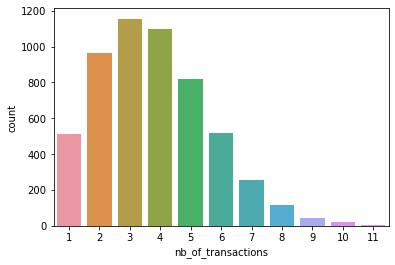

In [46]:
nb_transaction_by_client = new_transaction.cust_id.value_counts().reset_index()
nb_transaction_by_client.rename({'cust_id': 'nb_of_transactions'}, axis=1, inplace=True)
f1.hist(nb_transaction_by_client, 'nb_of_transactions')

We can see that most of customers buy more than 2 or 3 items.  
We will restrain our study only to those who buy 3 or more items

# V. Creation of the item-user matrix

## A. Setting treshold (to 3)

For this part, we will only focus on customer who have more than 3 rank for items

In [47]:
rank_count_treshold = 3
list_client = list(nb_transaction_by_client[nb_transaction_by_client['nb_of_transactions'] >= rank_count_treshold]['index'])
transaction_with_threshold = new_transaction[new_transaction.cust_id.isin(list_client)]
df = transaction_with_threshold.copy()
print('shape of original ratings data: ', new_transaction.shape)
print('shape of ratings data after dropping nactive users: ', df.shape)

shape of original ratings data:  (20876, 8)
shape of ratings data after dropping nactive users:  (18437, 8)


In [48]:
print('Number of unique customer left :',len(df.cust_id.unique()))

Number of unique customer left : 4031


We will save this new data frame to use it later

In [67]:
rating_table = transaction_with_threshold[['cust_id','rank', 'object_id', 'object_name']]
rating_table.to_csv('rating_table.csv', index=False)
rating_table.head()

,cust_id,rank,object_id,object_name
0,270384,5,3_5,Electronics_Computers
1,267750,3,6_12,Home and kitchen_Tools
2,275023,4,5_6,Books_DIY
3,269345,3,5_3,Books_Comics
4,268799,5,5_7,Books_Fiction


We now have only 4031 customers we will work with for the rest of the study

## B. Create the matrix

We create a df with a pivot_table which match each customer to the object_id they are intersted in and the value of the rank if there is one.  
Otherwize, we put a 0.

In [49]:
# pivot and create item-user matrix
obj_client_mat = df.pivot_table(index='cust_id', columns='object_id', values='rank', aggfunc='mean').fillna(0)
#we sve the table as a hdf file to keep index
obj_client_mat.to_hdf('user_item_matrix.hdf', 'user_item_matrix')
obj_client_mat.head()

object_id,1_1,1_3,1_4,2_1,2_3,2_4,3_10,3_4,3_5,3_8,...,5_10,5_11,5_12,5_3,5_6,5_7,6_10,6_11,6_12,6_2
cust_id,,,,,,,,,,,,,,,,,,,,,
266783,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
266785,0.0,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
266788,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
266794,0.0,3.5,0.0,0.0,2.5,0.0,1.5,0.0,0.0,4.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## C. Information about the matrix

In [61]:
num_users = len(df.cust_id.unique())
# create a df with only the cust_id we will focus on:
pd.DataFrame(df.cust_id.unique(), columns = ['unique_cust_id']).to_csv('list_cust_id.csv')

num_items = len(df.object_id.unique())
print('There are {} unique users and {} unique objects in this data set'.format(num_users, num_items))

There are 4031 unique users and 23 unique objects in this data set


* Count of how many rank we have in the matrix

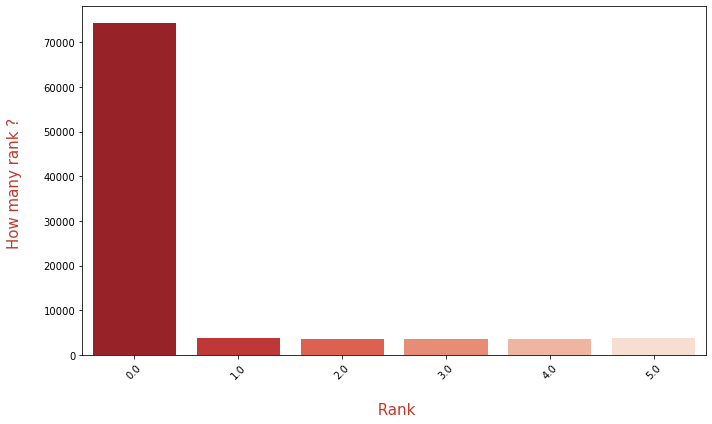

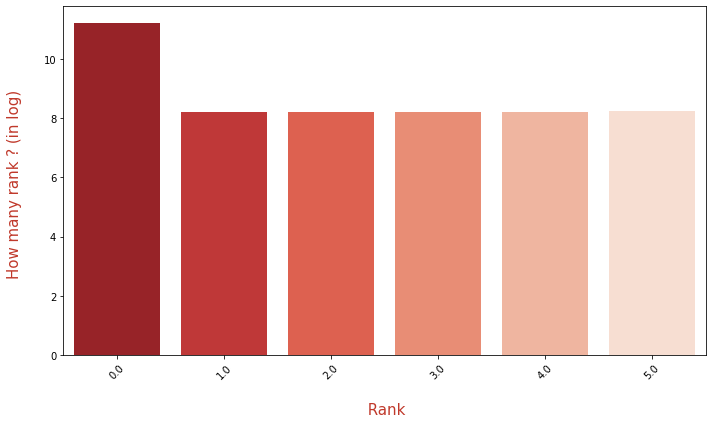

In [51]:
rank_count = f1.get_rank_count_logcount(df).reset_index().rename({'index': 'rank_rate'}, axis=1)
f1.barplot_display_rank(rank_count.reset_index(),'rank_rate', 'count', False)
f1.barplot_display_rank(rank_count.reset_index(),'rank_rate', 'log_count', True)

We have a lot of 0, and it's normal because it's represent user-item which have no connection.  
A lot of customer buy like 3 or 4 item over 23 so it's a sparse matrix (a lot of 0)

## End of the first part, please read part 2